# Group Surveys Feature Determination

## Preparation

### Import

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

## Function Definition

### Inlcude Marks Classification

In [3]:
def include_mark_classification(df):

    df = df[df['theory'] >= 0.5]
    limit1=0.65
    limit2= 0.8

    # Define the conditions and corresponding values
    conditions = [
        (df['theory'] >= 0.5) & (df['theory'] < limit1),
        (df['theory'] >= limit1) & (df['theory'] < limit2),
        (df['theory'] >= limit2) & (df['theory'] <= 1)
    ]
    values = [1,2,3]

    # Create the 'mark' column using np.select()
    df['mark'] = np.select(conditions, values, default='np.NaN')

    df = df.dropna(how='any')

    return df

### Inlcude Groupflow Classification

In [4]:
import pandas as pd

def assign_groupflow(df):
    # Create a new column 'groupflow' with default value as None
    df['groupflow'] = None

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Get the values of the three columns for the current row
        beeflow = row['Groupflow_Beeflow']
        leechflow = row['Groupflow_Leechflow']
        antflow = row['Groupflow_Antflow']

        # Compare the values and assign the corresponding category to 'groupflow'
        if beeflow >= leechflow and beeflow >= antflow:
            df.at[index, 'groupflow'] = 'bee'
        elif leechflow >= beeflow and leechflow >= antflow:
            df.at[index, 'groupflow'] = 'leech'
        else:
            df.at[index, 'groupflow'] = 'ant'

    # Return the modified DataFrame
    return df


### Min-Max Scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling_df(df, columns):

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)
    df[df_scaled.columns] = df_scaled

    return df

### Select Columns by Index

In [6]:
def select_columns_by_index(df, column_indexes):

    cols= column_indexes
    cols.append(len(df.columns)-1)
    selected_columns = df.iloc[:, cols].copy()
    selected_column_names = df.columns[column_indexes].tolist()

    return selected_columns, selected_column_names

### Prepare DataFrame for Modeling

In [7]:
def prepare_df_for_modeling(df):

  # Strip off leading and trailing whitespace from non-numeric columns
  df = df.select_dtypes(include=['int', 'float'])
  df = df[df['theory'] >= 0.5]
  df.reset_index(drop=True, inplace=True)

  return df

### Return Dataframe by Columns

In [8]:
def return_df_by_columns(df,column_names):

  new_df = df[column_names].copy()
  data = pd.concat([new_df, df['theory']], axis=1)

  return data

### Plot Average Performance

In [9]:

def plot_average_performance(column, df):
    # Calculate the average value of the specified column for each category
    avg_values = df.groupby('groupflow')[column].mean()

    # Get unique categories in 'groupflow' column
    categories = df['groupflow'].unique()

    # Define colors for each category
    colors = ['lightblue','yellow', (1, 0.4, 0.4)]

    # Specify the order of categories
    category_order = ['ant', 'bee', 'leech']

    # Plot the average value for each category as a histogram
    plt.bar(category_order, avg_values[category_order], color=[colors[category_order.index(cat)] for cat in category_order])

    # Set labels and title
    plt.xlabel('groupflow')
    plt.ylabel(f'Average {column}')
    plt.title(f'Average {column} by groupflow')

    # Display the plot
    plt.show()



### Get Indexes by Column names

In [10]:
def get_column_indexes(df, columns):
    # Get the indexes of the specified columns
    indexes = [df.columns.get_loc(col) for col in columns]
    return indexes

In [11]:
def perform_anova_by_category(df, column, limit=None):
    categories = df[column].unique()

    for feature in df.columns:
        if feature != column:
            print(f"Feature: {feature}")
            grouped_data = [df[df[column] == category][feature] for category in categories]
            f_value, p_value = stats.f_oneway(*grouped_data)

            if limit is None or p_value < limit:
                print(f"F-value: {f_value}")
                print(f"P-value: {p_value}")

            print("---")


In [12]:
def perform_ttest_between_categories(df, column, category1, category2):
    for feature in df.columns:
        if feature != column:
            print(f"Feature: {feature}")
            data_category1 = df[df[column] == category1][feature]
            data_category2 = df[df[column] == category2][feature]
            t_value, p_value = stats.ttest_ind(data_category1, data_category2)
            print(f"T-value: {t_value}")
            print(f"P-value: {p_value}")
            print("---")

## Individual Analysis


### Data Import

In [13]:
in_file= r'/content/drive/MyDrive/Projects/tps/finals/data/3_individual_features.xlsx'

# Read the Excel file into a DataFrame, using 'Id' column as the index
df= pd.read_excel(in_file, index_col='Id')

ing_file= r'/content/drive/MyDrive/Projects/tps/finals/data/2_group_features.xlsx'

# Read the Excel file into a DataFrame, using 'Id' column as the index
dfg= pd.read_excel(ing_file, index_col='Id')

In [14]:
dfg.head()

,turns_in_a_min,stdev_indiv_spoken_time_ratio,stdev_average_turn_duration,min_average_turn_duration,max_average_turn_duration,stdev_average_turn_duration_ratio,min_average_turn_duration_ratio,max_average_turn_duration_ratio,diff_average_turn_duration_ratio,avg_avg_time_without_speaking,stdev_avg_time_without_speaking,min_avg_time_without_speaking,max_avg_time_without_speaking,diff_avg_time_without_speaking,stdev_avg_time_without_speaking_ratio,min_avg_time_without_speaking_ratio,max_avg_time_without_speaking_ratio,diff_avg_time_without_speaking_ratio,avg_max_time_without_speaking,stdev_max_time_without_speaking,min_max_time_without_speaking,max_max_time_without_speaking,diff_max_time_without_speaking,avg_max_time_without_speaking_ratio,stdev_max_time_without_speaking_ratio,min_max_time_without_speaking_ratio,max_max_time_without_speaking_ratio,diff_max_time_without_speaking_ratio,avg_num_turns,stdev_num_turns,min_num_turns,max_num_turns,diff_num_turns,avg_num_turns_ratio,stdev_num_turns_ratio,min_num_turns_ratio,max_num_turns_ratio,diff_num_turns_ratio,avg_avg_turns_without_speaking,stdev_avg_turns_without_speaking,min_avg_turns_without_speaking,max_avg_turns_without_speaking,diff_avg_turns_without_speaking,avg_avg_turns_without_speaking_ratio,stdev_avg_turns_without_speaking_ratio,min_avg_turns_without_speaking_ratio,max_avg_turns_without_speaking_ratio,diff_avg_turns_without_speaking_ratio,avg_max_turns_without_speaking,stdev_max_turns_without_speaking,min_max_turns_without_speaking,max_max_turns_without_speaking,diff_max_turns_without_speaking,avg_max_turns_without_speaking_ratio,stdev_max_turns_without_speaking_ratio,min_max_turns_without_speaking_ratio,max_max_turns_without_speaking_ratio,diff_max_turns_without_speaking_ratio,avg_num_words,stdev_num_words,min_num_words,max_num_words,diff_num_words,avg_num_words_ratio,stdev_num_words_ratio,min_num_words_ratio,max_num_words_ratio,diff_num_words_ratio,avg_avg_words_turn,stdev_avg_words_turn,min_avg_words_turn,max_avg_words_turn,diff_avg_words_turn,avg_avg_words_turn_ratio,stdev_avg_words_turn_ratio,min_avg_words_turn_ratio,max_avg_words_turn_ratio,diff_avg_words_turn_ratio,avg_max_words_turn,stdev_max_words_turn,min_max_words_turn,max_max_words_turn,diff_max_words_turn,avg_max_words_turn_ratio,stdev_max_words_turn_ratio,min_max_words_turn_ratio,max_max_words_turn_ratio,diff_max_words_turn_ratio,messages_sent_mean,messages_sent_std,messages_sent_avg_difference,messages_total_mean,messages_total_std,messages_total_avg_difference,contribution_index_mean,contribution_index_std,contribution_index_avg_difference,sentiment_avg_mean,sentiment_avg_std,sentiment_avg_avg_difference,emotionality_avg_mean,emotionality_avg_std,emotionality_avg_avg_difference,influence_message_avg_mean,influence_message_avg_std,influence_message_avg_avg_difference,influence_total_in_mean,influence_message_avg_in_mean,influence_message_avg_in_std,influence_message_avg_in_avg_difference,influence_total_mean,contribution_index_oscillation_mean,contribution_index_oscillation_std,contribution_index_oscillation_avg_difference,activity_entanglement_mean,activity_entanglement_std,activity_entanglement_avg_difference,ALTERNATIVE_REALITIES_Treehugger_mean,ALTERNATIVE_REALITIES_Treehugger_std,ALTERNATIVE_REALITIES_Treehugger_avg_difference,ALTERNATIVE_REALITIES_Fatherlander_mean,ALTERNATIVE_REALITIES_Fatherlander_std,ALTERNATIVE_REALITIES_Fatherlander_avg_difference,ALTERNATIVE_REALITIES_Spiritualism_mean,ALTERNATIVE_REALITIES_Spiritualism_std,ALTERNATIVE_REALITIES_Spiritualism_avg_difference,ALTERNATIVE_REALITIES_Nerd_mean,ALTERNATIVE_REALITIES_Nerd_std,ALTERNATIVE_REALITIES_Nerd_avg_difference,EMOTIONS_Fear_mean,EMOTIONS_Fear_std,EMOTIONS_Fear_avg_difference,EMOTIONS_Happy_mean,EMOTIONS_Happy_std,EMOTIONS_Happy_avg_difference,EMOTIONS_Sad_mean,EMOTIONS_Sad_std,EMOTIONS_Sad_avg_difference,EMOTIONS_Anger_mean,EMOTIONS_Anger_std,EMOTIONS_Anger_avg_difference,Groupflow_Beeflow_mean,Groupflow_Beeflow_std,Groupflow_Beefl

In [15]:
df.head(100)

,indiv_spoken_time,indiv_spoken_time_ratio,average_turn_duration,average_turn_duration_ratio,avg_time_without_speaking,avg_time_without_speaking_ratio,max_time_without_speaking,max_time_without_speaking_ratio,num_turns,num_turns_ratio,avg_turns_without_speaking,avg_turns_without_speaking_ratio,max_turns_without_speaking,max_turns_without_speaking_ratio,num_words,num_words_ratio,avg_words_turn,avg_words_turn_ratio,max_words_turn,max_words_turn_ratio,speech_neu,speech_ang,speech_hap,speech_sad,text_joy,text_anger,text_fear,text_sadness,group,messages_sent,messages_total,contribution_index,ego_art,ego_nudges,alter_art,alter_nudges,sentiment_avg,emotionality_avg,complexity_avg,influence_message_avg,influence_total_in,influence_message_avg_in,influence_total,contribution_index_oscillation,activity_entanglement,ALTERNATIVE_REALITIES_Treehugger,ALTERNATIVE_REALITIES_Fatherlander,ALTERNATIVE_REALITIES_Spiritualism,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Fear,EMOTIONS_Happy,EMOTIONS_Sad,EMOTIONS_Anger,Groupflow_Beeflow,Groupflow_Leechflow,Groupflow_Antflow,ethical_likelihood,financial_likelihood,health_likelihood,recreational_likelihood,social_likelihood,total_likelihood,ethical_perceived,financial_perceived,health_perceived,recreational_perceived,social_perceived,total_perceived,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,dummy_question1,dummy_question2,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,conservation,transcendence,theory,coeval,project
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526,0.148336,7.850746,0.126865,56.210746,0.165958,451.54,0.264343,67,0.331683,1.985075,0.093801,7,0.090909,978,0.170800,14.597015,0.127952,68,0.078613,0.832695,0.137502,0.026347,0.003456,0.298809,0.236814,0.232361,0.232015,1,34,187,-0.64,1.332.855.889,2.468.578.279,1.234.255.833,1.903.921.545,0.303561,0.215562,9.179.501.577,0.346125353,1.227.594.788,0.346135338,1.730.626.767,1,0.487649,4.720845e-01,8.388939e-02,0.089140,3.548859e-01,0.236101,0.407447,0.251288,0.105165,0.497477,0.156358,0.346165,4.500000,3.500000,4.166667,3.166667,3.500000,3.766667,4.833333,5.666667,5.666667,5.833333,4.833333,5,0.600000,0.716667,0.600000,0.633333,0.583333,27,23,19,18,20,1,5,7,6,5,7,5,4,5,7,8,7,2.57,-1.78,3.44,0.90,8.0
2,2648,0.746757,33.948718,0.548598,21.791169,0.064337,109.24,0.063952,78,0.386139,1.589744,0.075120,9,0.116883,3816,0.666434,48.923077,0.428842,623,0.720231,0.795958,0.155654,0.045315,0.003074,0.292950,0.239695,0.227768,0.239587,1,75,228,-0.34,7.778.626.875,1.363.151.848,9.695.611.111,3.791.190.505,0.250396,0.236507,9.308.010.889,0.428515776,0.997035569,0.231981331,1.988.107.685,2,0.398994,4.385152e-01,4.023221e-02,0.107725,4.135278e-01,0.215535,0.417419,0.208064,0.158982,0.300955,0.220056,0.478989,2.000000,1.500000,1.000000,5.166667,5.500000,3.033333,4.000000,6.666667,6.500000,5.500000,3.000000,5,0.533333,0.666667,0.700000,0.616667,0.633333,22,28,11,7,11,0,5,2,6,4,4,7,8,8,0,5,4,-0.24,-0.33,3.64,0.91,8.0
3,105,0.029611,8.076923,0.130520,57.649231,0.170205,141.72,0.082966,13,0.064356,6.461538,0.305327,15,0.194805,267,0.046629,20.538462,0.180033,70,0.080925,0.789103,0.161515,0.037497,0.011885,0.297727,0.238513,0.230916,0.232844,1,38,191,-0.60,1.006.371.139,2.010.089.278,9.903.272.639,2.270.121.068,0.381860,0.254014,9.034.121.152,0.236068168,0.866593847,0.199153824,103.894.739,2,0.501416,1.573771e-01,2.897965e-02,0.053947,7.596967e-01,0.245048,0.410218,0.190879,0.153855,0.226931,0.238211,0.534858,4.500000,3.500000,2.666667,6.000000,6.000000,4.533333,5.000000,5.500000,5.500000,4.333333,2.833333,5,0.566667,0.683333,0.716667,0.533333,0.716667,23,28,9,6,7,1,5,6,7,6,8,8,8,6,3,2,6,-0.52,-2.03,3.98,0.90,8.0
4,162,0.045685,6.480000,0.104714,159.421600,0.470679,836.46,0.489685,25,0.123762,6.600000,0.311870,29,0.376623,394,0.068809,15.760000,0.138147,61,0.070520,0.712697,0.196289,0.077861,0.013153,0.300100,0.235307,0.232877,0.231716,1,27,180,-0.70,1.19

### Data Preparation

In [16]:
# Drop unnecesary columns
not_used_columns=['avg_time_without_speaking_ratio', 'max_time_without_speaking_ratio', 'avg_turns_without_speaking_ratio', 'max_turns_without_speaking_ratio', 'avg_words_turn_ratio', 'max_words_turn', 'max_words_turn_ratio', 'messages_total', 'alter_art', 'alter_nudges', 'complexity_avg', 'dummy_question1', 'dummy_question2', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'conservation', 'transcendence', 'coeval', 'project']
df.drop(columns=not_used_columns, inplace=True)

# Transform marks into 0-1
df['theory'] = df['theory'] / 6

# Clean outlayers
df = df[df['theory'] >= 0.5]

#df= prepare_df_for_modeling(df)
#df= min_max_scaling_df(df,df.columns.to_list()) ['average_turn_duration', 'num_turns', 'speech_hap', 'messages_sent', 'contribution_index', 'sentiment_avg', 'EMOTIONS_Happy', 'C', 'theory']

df = assign_groupflow(df)

<ipython-input-4-ae19a4939652>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['groupflow'] = None


In [17]:
df['ego_art'] = df['ego_art'].str[:5]
df['ego_nudges'] = df['ego_nudges'].str[:5]
df['influence_message_avg'] = df['influence_message_avg'].str[:5]
df['influence_total_in'] = df['influence_total_in'].str[:5]
df['influence_total'] = df['influence_total'].str[:5]
df['influence_message_avg_in'] = df['influence_message_avg_in'].str[:5]

import pandas as pd

def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

columns_to_convert = ['ego_art', 'ego_nudges', 'influence_message_avg', 'influence_total_in', 'influence_total', 'influence_message_avg_in']
df = convert_columns_to_numeric(df, columns_to_convert)


<ipython-input-17-7941f831ddf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ego_art'] = df['ego_art'].str[:5]
<ipython-input-17-7941f831ddf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ego_nudges'] = df['ego_nudges'].str[:5]
<ipython-input-17-7941f831ddf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

### Data Understanding

In [18]:
df.shape

(55, 69)

In [19]:
df.head(70)

,indiv_spoken_time,indiv_spoken_time_ratio,average_turn_duration,average_turn_duration_ratio,avg_time_without_speaking,max_time_without_speaking,num_turns,num_turns_ratio,avg_turns_without_speaking,max_turns_without_speaking,num_words,num_words_ratio,avg_words_turn,speech_neu,speech_ang,speech_hap,speech_sad,text_joy,text_anger,text_fear,text_sadness,group,messages_sent,contribution_index,ego_art,ego_nudges,sentiment_avg,emotionality_avg,influence_message_avg,influence_total_in,influence_message_avg_in,influence_total,contribution_index_oscillation,activity_entanglement,ALTERNATIVE_REALITIES_Treehugger,ALTERNATIVE_REALITIES_Fatherlander,ALTERNATIVE_REALITIES_Spiritualism,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Fear,EMOTIONS_Happy,EMOTIONS_Sad,EMOTIONS_Anger,Groupflow_Beeflow,Groupflow_Leechflow,Groupflow_Antflow,ethical_likelihood,financial_likelihood,health_likelihood,recreational_likelihood,social_likelihood,total_likelihood,ethical_perceived,financial_perceived,health_perceived,recreational_perceived,social_perceived,total_perceived,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,theory,groupflow
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526,0.148336,7.850746,0.126865,56.210746,451.54,67,0.331683,1.985075,7,978,0.170800,14.597015,0.832695,0.137502,0.026347,0.003456,0.298809,0.236814,0.232361,0.232015,1,34,-0.64,1.332,2.468,0.303561,0.215562,0.346,1.227,0.346,1.730,1,0.487649,4.720845e-01,8.388939e-02,0.089140,3.548859e-01,0.236101,0.407447,0.251288,0.105165,0.497477,0.156358,0.346165,4.500000,3.500000,4.166667,3.166667,3.500000,3.766667,4.833333,5.666667,5.666667,5.833333,4.833333,5,0.600000,0.716667,0.600000,0.633333,0.583333,27,23,19,18,20,0.573333,bee
2,2648,0.746757,33.948718,0.548598,21.791169,109.24,78,0.386139,1.589744,9,3816,0.666434,48.923077,0.795958,0.155654,0.045315,0.003074,0.292950,0.239695,0.227768,0.239587,1,75,-0.34,7.778,1.363,0.250396,0.236507,0.428,0.997,0.231,1.988,2,0.398994,4.385152e-01,4.023221e-02,0.107725,4.135278e-01,0.215535,0.417419,0.208064,0.158982,0.300955,0.220056,0.478989,2.000000,1.500000,1.000000,5.166667,5.500000,3.033333,4.000000,6.666667,6.500000,5.500000,3.000000,5,0.533333,0.666667,0.700000,0.616667,0.633333,22,28,11,7,11,0.606667,ant
3,105,0.029611,8.076923,0.130520,57.649231,141.72,13,0.064356,6.461538,15,267,0.046629,20.538462,0.789103,0.161515,0.037497,0.011885,0.297727,0.238513,0.230916,0.232844,1,38,-0.60,1.006,2.010,0.381860,0.254014,0.236,0.866,0.199,103.800,2,0.501416,1.573771e-01,2.897965e-02,0.053947,7.596967e-01,0.245048,0.410218,0.190879,0.153855,0.226931,0.238211,0.534858,4.500000,3.500000,2.666667,6.000000,6.000000,4.533333,5.000000,5.500000,5.500000,4.333333,2.833333,5,0.566667,0.683333,0.716667,0.533333,0.716667,23,28,9,6,7,0.663333,ant
4,162,0.045685,6.480000,0.104714,159.421600,836.46,25,0.123762,6.600000,29,394,0.068809,15.760000,0.712697,0.196289,0.077861,0.013153,0.300100,0.235307,0.232877,0.231716,1,27,-0.70,1.197,2.333,0.250852,0.259828,0.486,2.016,0.467,1.159,2,0.493443,2.585777e-01,7.323091e-02,0.112001,5.561903e-01,0.319698,0.322770,0.225624,0.131909,0.256794,0.232465,0.510740,2.166667,1.500000,1.000000,4.166667,4.833333,2.733333,5.833333,6.000000,6.333333,5.000000,4.166667,5,0.566667,0.783333,0.733333,0.733333,0.633333,17,24,17,13,8,0.703333,ant
5,105,0.029611,5.526316,0.089303,43.632632,169.20,19,0.094059,4.526316,17,271,0.047328,14.263158,0.746439,0.193365,0.054215,0.005981,0.303593,0.235377,0.233832,0.227198,1,22,-0.75,8.437,2.777,0.305600,0.244289,0.360,178.000,0.421,0.970,1,0.555323,3.625429e-01,3.140000e-04,0.136496,5.006478e-01,0.157227,0.472688,0.321906,0.048179,0.342162,0.120088,0.537751,3.166667,2.666667,3.500000,5.166667,3.666667,3.633333,3.666667,5.833333,3.666667,3.000000,3.666667,4,0.600000,0.666667,0.483333,0.583333,0.433333,12,15,11,19,4,0.623333,ant
6,1346,0.337682,8.518987,0.185779,19.887848,169.82,158,0.364055,1.740506,9,4025,0.329109,2

In [20]:
# Select the columns 'Groupflow_Beeflow' and 'theory'
selected_columns = df[['Groupflow_Beeflow', 'theory','groupflow']]

# Sort the DataFrame by the 'Groupflow_Beeflow' column
sorted_df = selected_columns.sort_values(by='theory', ascending=False)

# Print the sorted DataFrame
print(sorted_df)


    Groupflow_Beeflow    theory groupflow
Id                                       
11           0.399318  0.928333       bee
34           0.326820  0.923333       ant
10           0.221334  0.888333       ant
56           0.394566  0.873333       ant
12           0.299807  0.841667       ant
51           0.286532  0.820000       ant
31           0.400245  0.813333       bee
40           0.023929  0.806667       ant
15           0.053277  0.800000       ant
14           0.377483  0.786667       bee
6            0.332323  0.773333       ant
13           0.004723  0.766667       ant
43           0.344240  0.751667       ant
33           0.260964  0.736667       ant
44           0.389559  0.733333       ant
39           0.042325  0.730000       ant
9            0.065323  0.728333       ant
32           0.376093  0.720000       bee
26           0.506875  0.708333       bee
62           0.356071  0.708333       ant
4            0.256794  0.703333       ant
55           0.607518  0.701667   

In [21]:
df['groupflow'].value_counts()

ant      40
bee      14
leech     1
Name: groupflow, dtype: int64

In [22]:
df[['group', 'theory','groupflow']].head(70)

,group,theory,groupflow
Id,,,
1,1,0.573333,bee
2,1,0.606667,ant
3,1,0.663333,ant
4,1,0.703333,ant
5,1,0.623333,ant
6,2,0.773333,ant
8,2,0.601667,bee
9,2,0.728333,ant
10,2,0.888333,ant


In [23]:
### check percent bees with performance

### Analysis

In [24]:
# Group the DataFrame by 'groupflow' and calculate the average of other columns
grouped_df = df.groupby('groupflow').mean()
grouped_df.head()

,indiv_spoken_time,indiv_spoken_time_ratio,average_turn_duration,average_turn_duration_ratio,avg_time_without_speaking,max_time_without_speaking,num_turns,num_turns_ratio,avg_turns_without_speaking,max_turns_without_speaking,num_words,num_words_ratio,avg_words_turn,speech_neu,speech_ang,speech_hap,speech_sad,text_joy,text_anger,text_fear,text_sadness,group,messages_sent,contribution_index,ego_art,ego_nudges,sentiment_avg,emotionality_avg,influence_message_avg,influence_total_in,influence_message_avg_in,influence_total,contribution_index_oscillation,activity_entanglement,ALTERNATIVE_REALITIES_Treehugger,ALTERNATIVE_REALITIES_Fatherlander,ALTERNATIVE_REALITIES_Spiritualism,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Fear,EMOTIONS_Happy,EMOTIONS_Sad,EMOTIONS_Anger,Groupflow_Beeflow,Groupflow_Leechflow,Groupflow_Antflow,ethical_likelihood,financial_likelihood,health_likelihood,recreational_likelihood,social_likelihood,total_likelihood,ethical_perceived,financial_perceived,health_perceived,recreational_perceived,social_perceived,total_perceived,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,theory
groupflow,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ant,1964.150000,0.214219,10.785191,0.207717,81.561421,1751.176500,88.100000,0.201226,4.979334,28.625000,2315.900000,0.208128,23.334506,0.786891,0.180288,0.028625,0.004196,0.292954,0.239750,0.233128,0.234169,6.4,23.425000,-0.607500,7.683450,22.421075,0.363341,0.256860,0.277000,7.749625,0.292775,3.259025,2.600000,0.484810,0.298458,0.051611,0.143831,0.506100,0.198721,0.463484,0.208388,0.129407,0.224293,0.177810,0.597898,2.766667,3.095833,3.045833,4.654167,5.120833,3.736667,4.683333,5.395833,5.300000,4.495833,3.533333,4.575000,0.618750,0.687500,0.661250,0.616667,0.549583,20.75,22.925000,15.750000,13.825000,12.400000,0.666500
bee,1205.642857,0.170833,13.947778,0.197803,121.740108,6059.735714,120.071429,0.188670,6.048879,71.428571,2391.285714,0.183338,27.120184,0.800345,0.169487,0.026000,0.004168,0.287020,0.238163,0.242082,0.232735,6.5,34.928571,-0.602143,1.648286,2.835000,0.402274,0.243703,0.438714,1.170500,0.502857,16.944000,2.785714,0.473491,0.279049,0.092469,0.088395,0.540087,0.216887,0.492100,0.173703,0.117310,0.468755,0.198635,0.332610,2.535714,3.119048,2.976190,5.071429,5.059524,3.752381,4.869048,5.380952,5.654762,4.476190,3.428571,4.714286,0.598810,0.694048,0.644048,0.605952,0.560714,23.00,21.785714,16.071429,17.214286,15.642857,0.662500
leech,587.000000,0.117682,7.072289,0.140902,64.410120,700.140000,83.000000,0.139966,6.048193,55.000000,1517.000000,0.124100,18.277108,0.901034,0.087045,0.010155,0.001766,0.281229,0.229487,0.258993,0.230291,12.0,23.000000,-0.880000,6.005000,9.279000,0.378586,0.200108,0.442000,0.694000,0.486000,0.967000,5.000000,0.519054,0.000180,0.346846,0.130924,0.522050,0.268045,0.349683,0.181261,0.201011,0.293414,0.459167,0.247419,3.000000,3.333333,3.333333,6.333333,5.000000,4.200000,3.666667,5.333333,4.166667,2.333333,2.166667,4.000000,0.633333,0.650000,0.666667,0.550000,0.483333,11.00,21.000000,12.000000,14.000000,5.000000,0.503333


In [25]:
# Find the maximum values for each row
max_values = grouped_df.max(axis=0)

# Get the column names where the 'bee' index has greater values than others
bee_columns = grouped_df.columns[grouped_df.loc['bee'] == max_values]

# Print the columns where the 'bee' index has greater values
grouped_df[bee_columns].head()

,average_turn_duration,avg_time_without_speaking,max_time_without_speaking,num_turns,avg_turns_without_speaking,max_turns_without_speaking,num_words,avg_words_turn,messages_sent,contribution_index,sentiment_avg,influence_message_avg_in,influence_total,ALTERNATIVE_REALITIES_Nerd,EMOTIONS_Happy,Groupflow_Beeflow,ethical_perceived,health_perceived,total_perceived,C,N,harm_care_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score
groupflow,,,,,,,,,,,,,,,,,,,,,,,,,
ant,10.785191,81.561421,1751.176500,88.100000,4.979334,28.625000,2315.900000,23.334506,23.425000,-0.607500,0.363341,0.292775,3.259025,0.506100,0.463484,0.224293,4.683333,5.300000,4.575000,0.687500,0.549583,20.75,15.750000,13.825000,12.400000
bee,13.947778,121.740108,6059.735714,120.071429,6.048879,71.428571,2391.285714,27.120184,34.928571,-0.602143,0.402274,0.502857,16.944000,0.540087,0.492100,0.468755,4.869048,5.654762,4.714286,0.694048,0.560714,23.00,16.071429,17.214286,15.642857
leech,7.072289,64.410120,700.140000,83.000000,6.048193,55.000000,1517.000000,18.277108,23.000000,-0.880000,0.378586,0.486000,0.967000,0.522050,0.349683,0.293414,3.666667,4.166667,4.000000,0.650000,0.483333,11.00,12.000000,14.000000,5.000000


In [26]:
print(bee_columns.to_list())

['average_turn_duration', 'avg_time_without_speaking', 'max_time_without_speaking', 'num_turns', 'avg_turns_without_speaking', 'max_turns_without_speaking', 'num_words', 'avg_words_turn', 'messages_sent', 'contribution_index', 'sentiment_avg', 'influence_message_avg_in', 'influence_total', 'ALTERNATIVE_REALITIES_Nerd', 'EMOTIONS_Happy', 'Groupflow_Beeflow', 'ethical_perceived', 'health_perceived', 'total_perceived', 'C', 'N', 'harm_care_score', 'in_group_loyality_score', 'authority_respect_score', 'purity_sanctity_score']


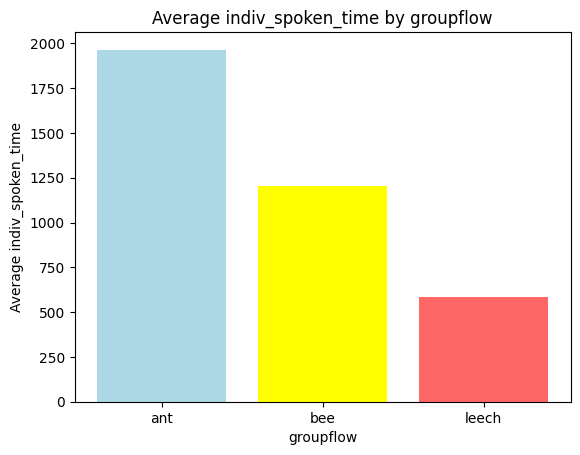

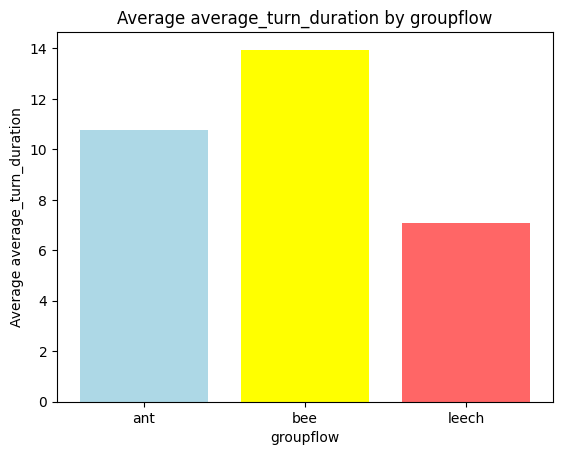

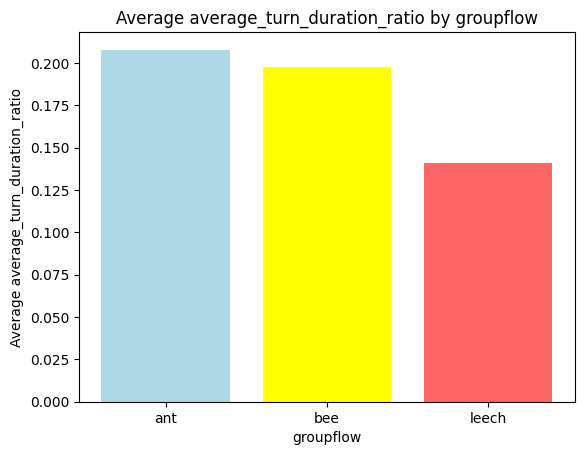

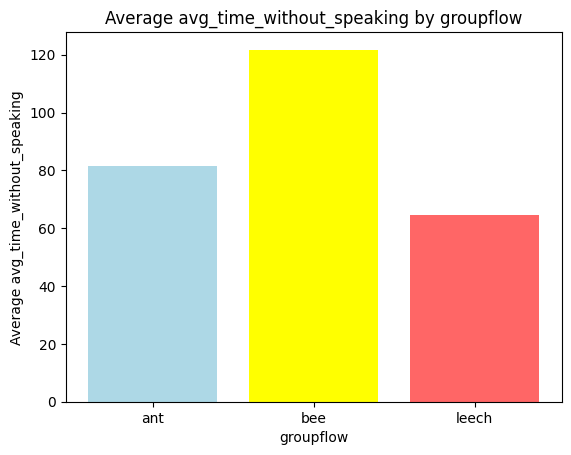

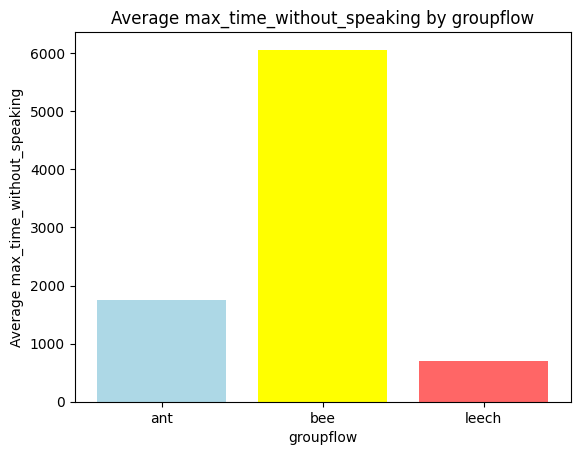

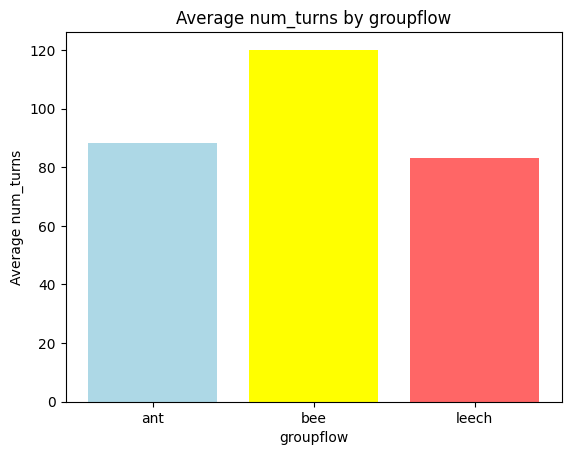

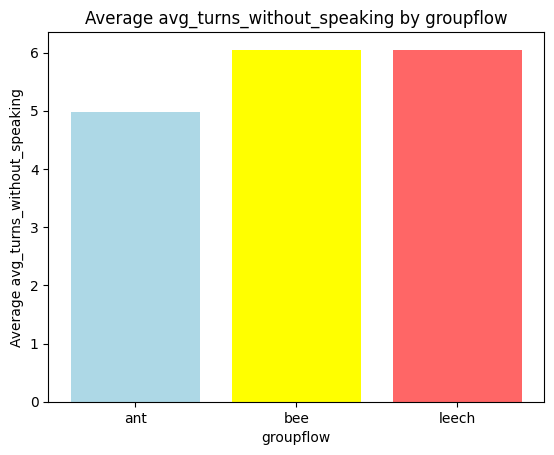

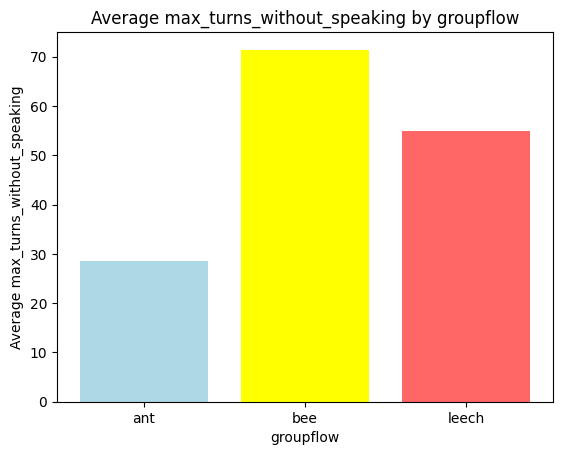

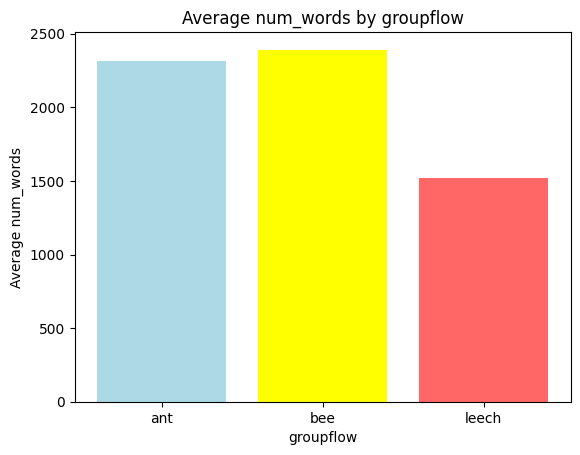

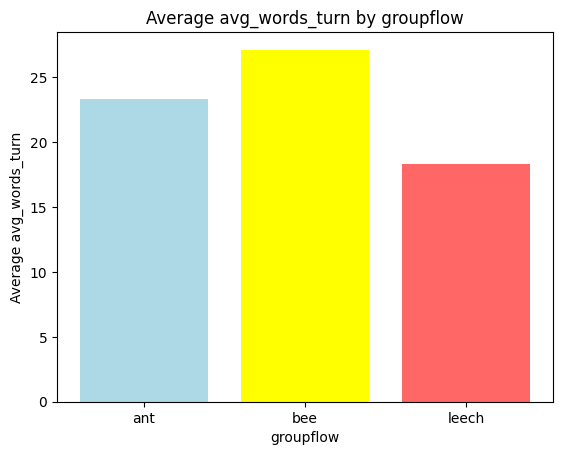

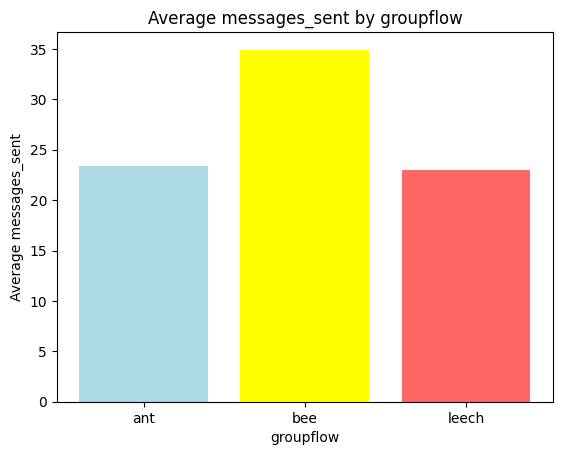

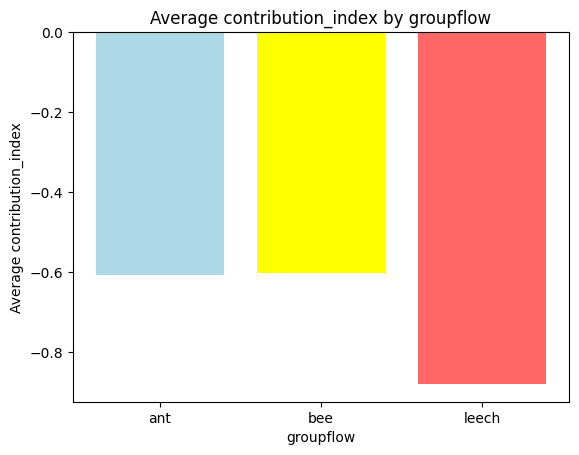

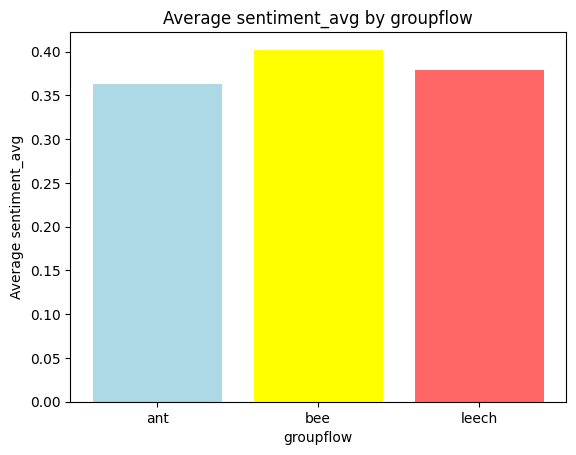

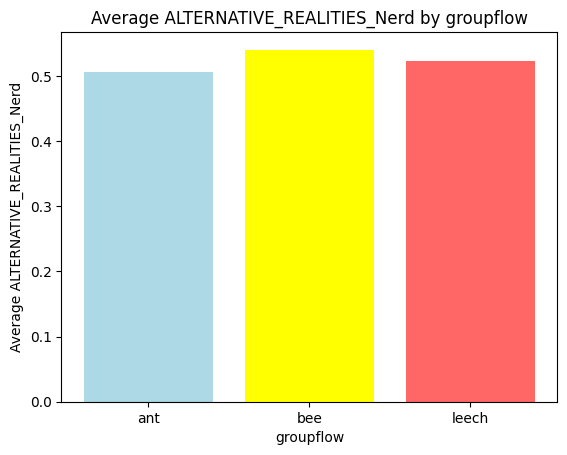

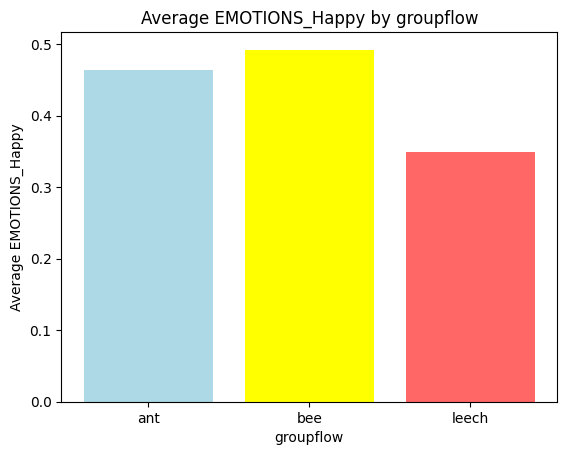

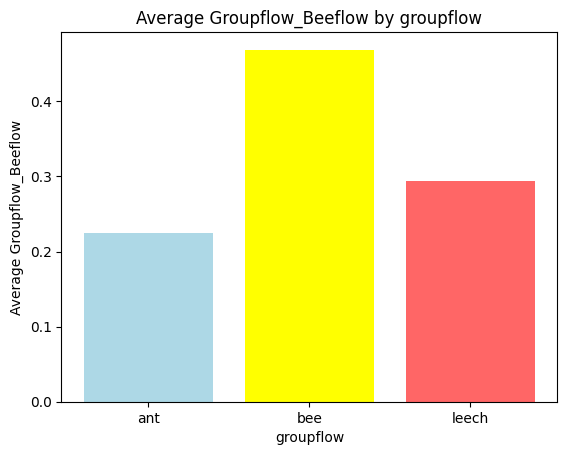

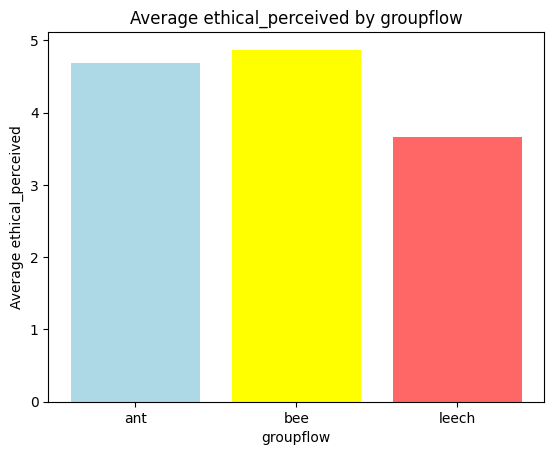

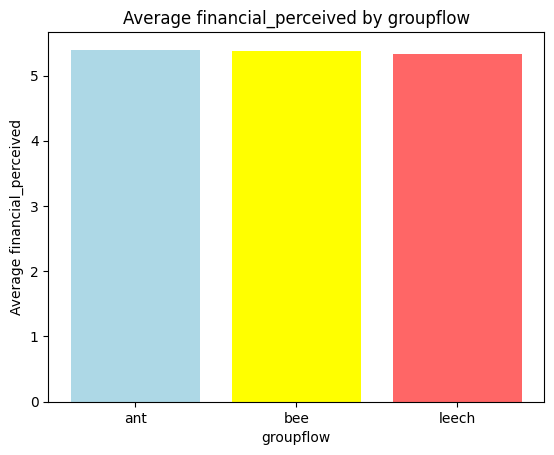

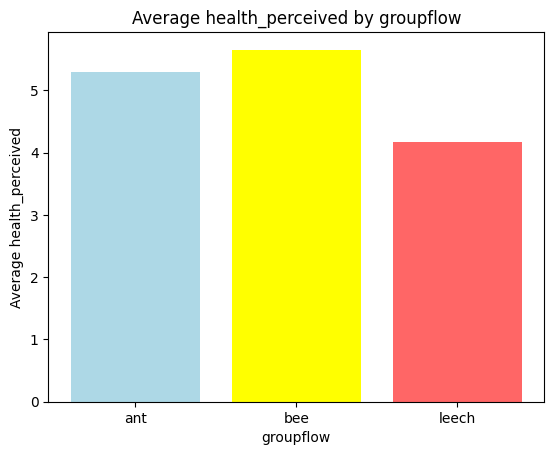

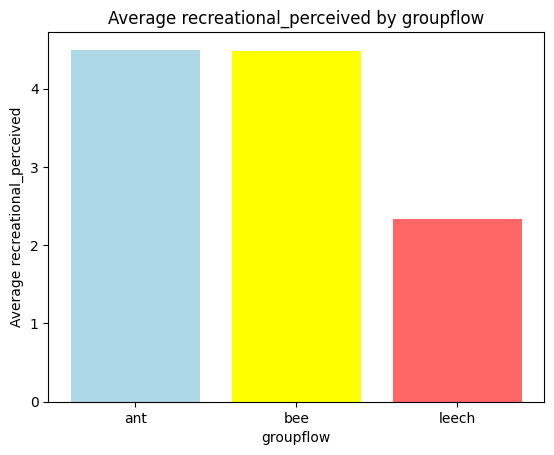

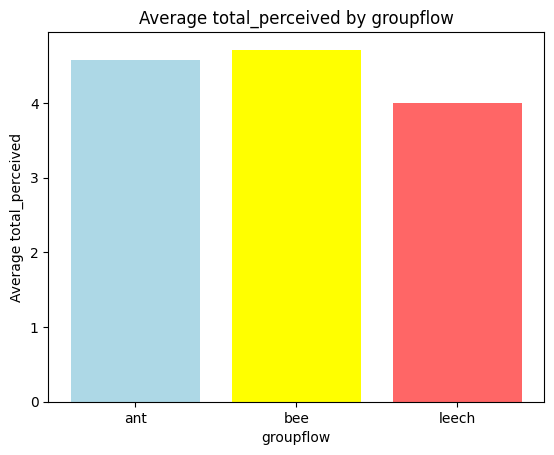

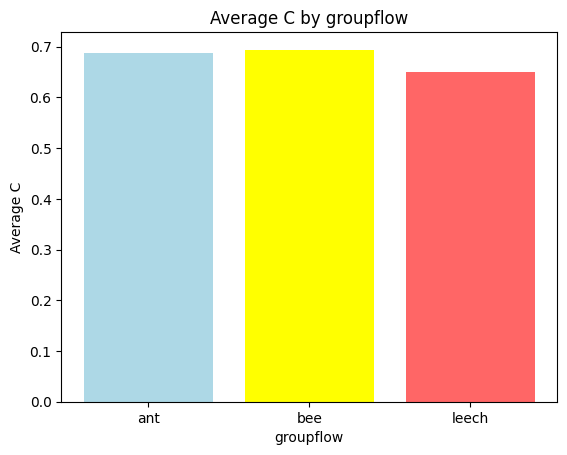

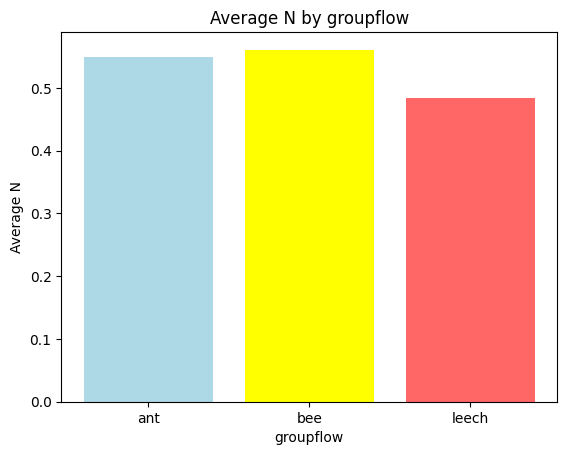

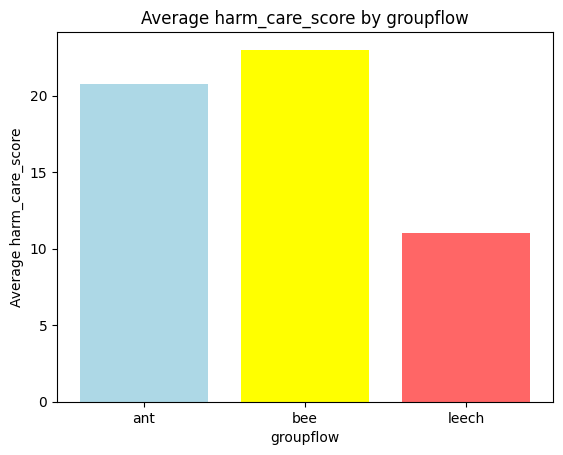

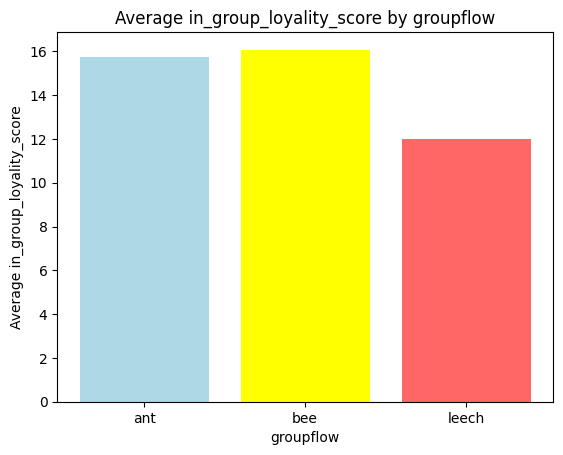

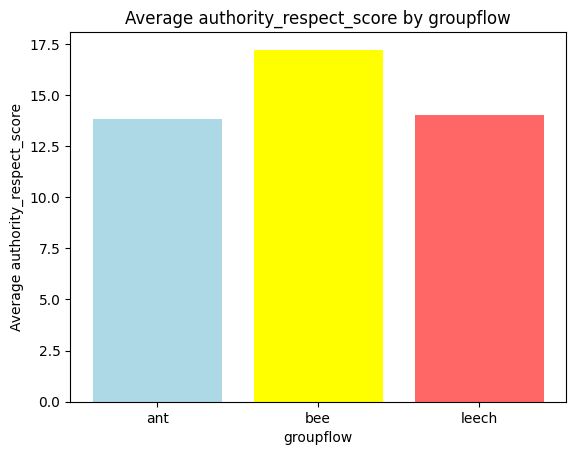

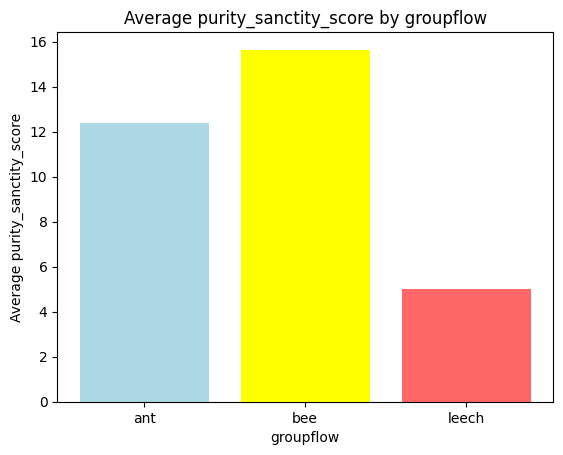

In [27]:
features = ['indiv_spoken_time', 'average_turn_duration', 'average_turn_duration_ratio', 'avg_time_without_speaking', 'max_time_without_speaking', 'num_turns', 'avg_turns_without_speaking', 'max_turns_without_speaking', 'num_words', 'avg_words_turn', 'messages_sent', 'contribution_index', 'sentiment_avg', 'ALTERNATIVE_REALITIES_Nerd', 'EMOTIONS_Happy', 'Groupflow_Beeflow', 'ethical_perceived', 'financial_perceived', 'health_perceived', 'recreational_perceived', 'total_perceived', 'C', 'N', 'harm_care_score', 'in_group_loyality_score', 'authority_respect_score', 'purity_sanctity_score']
# 'num_turns', 'messages_sent', 'EMOTIONS_Happy'
for fea in features:
  plot_average_performance(fea, df)

In [28]:
def split_dataframe_by_category(df, column_name):
    unique_categories = df[column_name].unique()
    category_dataframes = {}

    for category in unique_categories:
        category_dataframes[category] = df[df[column_name] == category]

    return category_dataframes

# Assuming you have a dataframe called 'my_dataframe' with a 'groupflow' column
result = split_dataframe_by_category(df, 'groupflow')

# Access the individual dataframes for each category
bee = result['bee']
ant = result['ant']
leech = result['leech']


## Group Analysis

In [29]:
# Calculate the percentage of 'groupflow' equal to 'bee' for each group
df['bee_percentage'] = df.groupby('group')['groupflow'].transform(lambda x: (x == 'bee').mean() )
group_dict = df.set_index('group')['bee_percentage'].to_dict()

# Group the DataFrame by 'group' and calculate the mean of 'theory'
group_means = df.groupby('group')['theory'].mean()
indiv_dict = group_means.to_dict()

In [30]:
dfg.head(15)

,turns_in_a_min,stdev_indiv_spoken_time_ratio,stdev_average_turn_duration,min_average_turn_duration,max_average_turn_duration,stdev_average_turn_duration_ratio,min_average_turn_duration_ratio,max_average_turn_duration_ratio,diff_average_turn_duration_ratio,avg_avg_time_without_speaking,stdev_avg_time_without_speaking,min_avg_time_without_speaking,max_avg_time_without_speaking,diff_avg_time_without_speaking,stdev_avg_time_without_speaking_ratio,min_avg_time_without_speaking_ratio,max_avg_time_without_speaking_ratio,diff_avg_time_without_speaking_ratio,avg_max_time_without_speaking,stdev_max_time_without_speaking,min_max_time_without_speaking,max_max_time_without_speaking,diff_max_time_without_speaking,avg_max_time_without_speaking_ratio,stdev_max_time_without_speaking_ratio,min_max_time_without_speaking_ratio,max_max_time_without_speaking_ratio,diff_max_time_without_speaking_ratio,avg_num_turns,stdev_num_turns,min_num_turns,max_num_turns,diff_num_turns,avg_num_turns_ratio,stdev_num_turns_ratio,min_num_turns_ratio,max_num_turns_ratio,diff_num_turns_ratio,avg_avg_turns_without_speaking,stdev_avg_turns_without_speaking,min_avg_turns_without_speaking,max_avg_turns_without_speaking,diff_avg_turns_without_speaking,avg_avg_turns_without_speaking_ratio,stdev_avg_turns_without_speaking_ratio,min_avg_turns_without_speaking_ratio,max_avg_turns_without_speaking_ratio,diff_avg_turns_without_speaking_ratio,avg_max_turns_without_speaking,stdev_max_turns_without_speaking,min_max_turns_without_speaking,max_max_turns_without_speaking,diff_max_turns_without_speaking,avg_max_turns_without_speaking_ratio,stdev_max_turns_without_speaking_ratio,min_max_turns_without_speaking_ratio,max_max_turns_without_speaking_ratio,diff_max_turns_without_speaking_ratio,avg_num_words,stdev_num_words,min_num_words,max_num_words,diff_num_words,avg_num_words_ratio,stdev_num_words_ratio,min_num_words_ratio,max_num_words_ratio,diff_num_words_ratio,avg_avg_words_turn,stdev_avg_words_turn,min_avg_words_turn,max_avg_words_turn,diff_avg_words_turn,avg_avg_words_turn_ratio,stdev_avg_words_turn_ratio,min_avg_words_turn_ratio,max_avg_words_turn_ratio,diff_avg_words_turn_ratio,avg_max_words_turn,stdev_max_words_turn,min_max_words_turn,max_max_words_turn,diff_max_words_turn,avg_max_words_turn_ratio,stdev_max_words_turn_ratio,min_max_words_turn_ratio,max_max_words_turn_ratio,diff_max_words_turn_ratio,messages_sent_mean,messages_sent_std,messages_sent_avg_difference,messages_total_mean,messages_total_std,messages_total_avg_difference,contribution_index_mean,contribution_index_std,contribution_index_avg_difference,sentiment_avg_mean,sentiment_avg_std,sentiment_avg_avg_difference,emotionality_avg_mean,emotionality_avg_std,emotionality_avg_avg_difference,influence_message_avg_mean,influence_message_avg_std,influence_message_avg_avg_difference,influence_total_in_mean,influence_message_avg_in_mean,influence_message_avg_in_std,influence_message_avg_in_avg_difference,influence_total_mean,contribution_index_oscillation_mean,contribution_index_oscillation_std,contribution_index_oscillation_avg_difference,activity_entanglement_mean,activity_entanglement_std,activity_entanglement_avg_difference,ALTERNATIVE_REALITIES_Treehugger_mean,ALTERNATIVE_REALITIES_Treehugger_std,ALTERNATIVE_REALITIES_Treehugger_avg_difference,ALTERNATIVE_REALITIES_Fatherlander_mean,ALTERNATIVE_REALITIES_Fatherlander_std,ALTERNATIVE_REALITIES_Fatherlander_avg_difference,ALTERNATIVE_REALITIES_Spiritualism_mean,ALTERNATIVE_REALITIES_Spiritualism_std,ALTERNATIVE_REALITIES_Spiritualism_avg_difference,ALTERNATIVE_REALITIES_Nerd_mean,ALTERNATIVE_REALITIES_Nerd_std,ALTERNATIVE_REALITIES_Nerd_avg_difference,EMOTIONS_Fear_mean,EMOTIONS_Fear_std,EMOTIONS_Fear_avg_difference,EMOTIONS_Happy_mean,EMOTIONS_Happy_std,EMOTIONS_Happy_avg_difference,EMOTIONS_Sad_mean,EMOTIONS_Sad_std,EMOTIONS_Sad_avg_difference,EMOTIONS_Anger_mean,EMOTIONS_Anger_std,EMOTIONS_Anger_avg_difference,Groupflow_Beeflow_mean,Groupflow_Beeflow_std,Groupflow_Beefl

In [31]:
def print_high_correlations(df, limit):
    correlation_matrix = df.corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > limit:
                feature1 = correlation_matrix.columns[i]
                feature2 = correlation_matrix.columns[j]
                print(f"Features: {feature1} and {feature2}")
                print(f"Correlation: {correlation}")
                print("---")


In [32]:
# Assuming you have a dataframe called 'my_dataframe'
print_high_correlations(dfg, 0.7)


Features: turns_in_a_min and max_average_turn_duration
Correlation: -0.7158963883285508
---
Features: turns_in_a_min and stdev_avg_words_turn
Correlation: -0.7475732043610692
---
Features: turns_in_a_min and max_avg_words_turn
Correlation: -0.8102202519736394
---
Features: turns_in_a_min and diff_avg_words_turn
Correlation: -0.7497951097861509
---
Features: turns_in_a_min and stdev_max_words_turn
Correlation: -0.7525612548418514
---
Features: turns_in_a_min and max_max_words_turn
Correlation: -0.7342674238217932
---
Features: turns_in_a_min and diff_max_words_turn
Correlation: -0.7685116153542096
---
Features: turns_in_a_min and ALTERNATIVE_REALITIES_Treehugger_std
Correlation: -0.7040496585317702
---
Features: turns_in_a_min and ALTERNATIVE_REALITIES_Treehugger_avg_difference
Correlation: -0.7260874138358605
---
Features: turns_in_a_min and ALTERNATIVE_REALITIES_Nerd_std
Correlation: -0.7348529505631358
---
Features: turns_in_a_min and ALTERNATIVE_REALITIES_Nerd_avg_difference
Correla

In [33]:
ordered_values = dfg['final_project'].sort_values()
print(ordered_values)

Id
10    0.60
9     0.68
12    0.70
4     0.70
5     0.70
1     0.80
3     0.80
8     0.80
2     0.85
6     0.87
7     0.88
11    0.90
Name: final_project, dtype: float64


In [34]:
import numpy as np

# Define the conditions and corresponding values
conditions = [
    (dfg['final_project'] >= 0.6) & (dfg['final_project'] <= 0.7),
    (dfg['final_project'] > 0.7) & (dfg['final_project'] <= 0.85),
    (dfg['final_project'] > 0.85) & (dfg['final_project'] <= 1)
]
values = [1, 2, 3]

# Create the 'performance_group' column based on the conditions and values
dfg['performance_group'] = np.select(conditions, values, default=np.nan)

print(dfg['performance_group'].value_counts())

1.0    5
2.0    4
3.0    3
Name: performance_group, dtype: int64


In [35]:
# Create a new column 'bee_percentage' using the dictionary values
dfg['bee_percentage'] = dfg.index.map(group_dict)
dfg['indiv_mean_perf'] = dfg.index.map(indiv_dict)

# Create a new column 'has_bee' based on 'bee_percentage' values
dfg['has_bee'] = dfg['bee_percentage'] > 0

In [36]:
# Group the DataFrame by 'mark' and calculate the average of other columns
grouped_df = dfg.groupby('performance_group').mean()

grouped_df.head()

,turns_in_a_min,stdev_indiv_spoken_time_ratio,stdev_average_turn_duration,min_average_turn_duration,max_average_turn_duration,stdev_average_turn_duration_ratio,min_average_turn_duration_ratio,max_average_turn_duration_ratio,diff_average_turn_duration_ratio,avg_avg_time_without_speaking,stdev_avg_time_without_speaking,min_avg_time_without_speaking,max_avg_time_without_speaking,diff_avg_time_without_speaking,stdev_avg_time_without_speaking_ratio,min_avg_time_without_speaking_ratio,max_avg_time_without_speaking_ratio,diff_avg_time_without_speaking_ratio,avg_max_time_without_speaking,stdev_max_time_without_speaking,min_max_time_without_speaking,max_max_time_without_speaking,diff_max_time_without_speaking,avg_max_time_without_speaking_ratio,stdev_max_time_without_speaking_ratio,min_max_time_without_speaking_ratio,max_max_time_without_speaking_ratio,diff_max_time_without_speaking_ratio,avg_num_turns,stdev_num_turns,min_num_turns,max_num_turns,diff_num_turns,avg_num_turns_ratio,stdev_num_turns_ratio,min_num_turns_ratio,max_num_turns_ratio,diff_num_turns_ratio,avg_avg_turns_without_speaking,stdev_avg_turns_without_speaking,min_avg_turns_without_speaking,max_avg_turns_without_speaking,diff_avg_turns_without_speaking,avg_avg_turns_without_speaking_ratio,stdev_avg_turns_without_speaking_ratio,min_avg_turns_without_speaking_ratio,max_avg_turns_without_speaking_ratio,diff_avg_turns_without_speaking_ratio,avg_max_turns_without_speaking,stdev_max_turns_without_speaking,min_max_turns_without_speaking,max_max_turns_without_speaking,diff_max_turns_without_speaking,avg_max_turns_without_speaking_ratio,stdev_max_turns_without_speaking_ratio,min_max_turns_without_speaking_ratio,max_max_turns_without_speaking_ratio,diff_max_turns_without_speaking_ratio,avg_num_words,stdev_num_words,min_num_words,max_num_words,diff_num_words,avg_num_words_ratio,stdev_num_words_ratio,min_num_words_ratio,max_num_words_ratio,diff_num_words_ratio,avg_avg_words_turn,stdev_avg_words_turn,min_avg_words_turn,max_avg_words_turn,diff_avg_words_turn,avg_avg_words_turn_ratio,stdev_avg_words_turn_ratio,min_avg_words_turn_ratio,max_avg_words_turn_ratio,diff_avg_words_turn_ratio,avg_max_words_turn,stdev_max_words_turn,min_max_words_turn,max_max_words_turn,diff_max_words_turn,avg_max_words_turn_ratio,stdev_max_words_turn_ratio,min_max_words_turn_ratio,max_max_words_turn_ratio,diff_max_words_turn_ratio,messages_sent_mean,messages_sent_std,messages_sent_avg_difference,messages_total_mean,messages_total_std,messages_total_avg_difference,contribution_index_mean,contribution_index_std,contribution_index_avg_difference,sentiment_avg_mean,sentiment_avg_std,sentiment_avg_avg_difference,emotionality_avg_mean,emotionality_avg_std,emotionality_avg_avg_difference,influence_message_avg_mean,influence_message_avg_std,influence_message_avg_avg_difference,influence_total_in_mean,influence_message_avg_in_mean,influence_message_avg_in_std,influence_message_avg_in_avg_difference,influence_total_mean,contribution_index_oscillation_mean,contribution_index_oscillation_std,contribution_index_oscillation_avg_difference,activity_entanglement_mean,activity_entanglement_std,activity_entanglement_avg_difference,ALTERNATIVE_REALITIES_Treehugger_mean,ALTERNATIVE_REALITIES_Treehugger_std,ALTERNATIVE_REALITIES_Treehugger_avg_difference,ALTERNATIVE_REALITIES_Fatherlander_mean,ALTERNATIVE_REALITIES_Fatherlander_std,ALTERNATIVE_REALITIES_Fatherlander_avg_difference,ALTERNATIVE_REALITIES_Spiritualism_mean,ALTERNATIVE_REALITIES_Spiritualism_std,ALTERNATIVE_REALITIES_Spiritualism_avg_difference,ALTERNATIVE_REALITIES_Nerd_mean,ALTERNATIVE_REALITIES_Nerd_std,ALTERNATIVE_REALITIES_Nerd_avg_difference,EMOTIONS_Fear_mean,EMOTIONS_Fear_std,EMOTIONS_Fear_avg_difference,EMOTIONS_Happy_mean,EMOTIONS_Happy_std,EMOTIONS_Happy_avg_difference,EMOTIONS_Sad_mean,EMOTIONS_Sad_std,EMOTIONS_Sad_avg_difference,EMOTIONS_Anger_mean,EMOTIONS_Anger_std,EMOTIONS_Anger_avg_difference,Groupflow_Beeflow_mean,Groupflow_Beeflow_std,Groupflow_Beefl

In [37]:
# stdev_indiv_spoken_time_ratio , sentiment_avg_mean , EMOTIONS_Happy_mean

In [38]:
perform_anova_by_category(dfg, 'performance_group',0.05)


Feature: turns_in_a_min
---
Feature: stdev_indiv_spoken_time_ratio
---
Feature: stdev_average_turn_duration
---
Feature: min_average_turn_duration
---
Feature: max_average_turn_duration
---
Feature: stdev_average_turn_duration_ratio
---
Feature: min_average_turn_duration_ratio
---
Feature: max_average_turn_duration_ratio
---
Feature: diff_average_turn_duration_ratio
---
Feature: avg_avg_time_without_speaking
---
Feature: stdev_avg_time_without_speaking
---
Feature: min_avg_time_without_speaking
---
Feature: max_avg_time_without_speaking
---
Feature: diff_avg_time_without_speaking
---
Feature: stdev_avg_time_without_speaking_ratio
---
Feature: min_avg_time_without_speaking_ratio
---
Feature: max_avg_time_without_speaking_ratio
---
Feature: diff_avg_time_without_speaking_ratio
---
Feature: avg_max_time_without_speaking
---
Feature: stdev_max_time_without_speaking
---
Feature: min_max_time_without_speaking
---
Feature: max_max_time_without_speaking
---
Feature: diff_max_time_without_speak

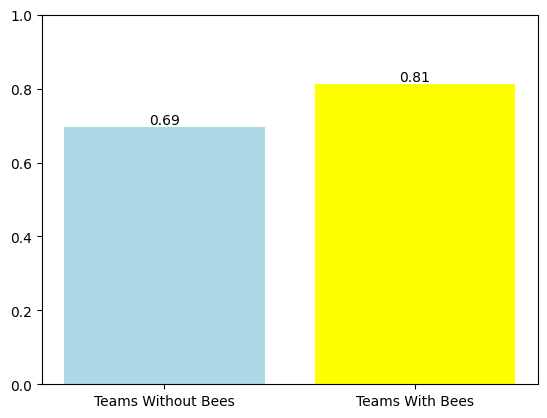

In [39]:
# Group the DataFrame by 'has_bee' column and calculate the average of 'final_project'
avg_final_project = dfg.groupby('has_bee')['final_project'].mean()

# Define custom colors for the bars
colors = ['lightblue', 'yellow']

# Define custom labels for the bars
labels = ['Teams Without Bees', 'Teams With Bees']

# Plot the histogram with custom colors and labels
plt.bar(labels, avg_final_project, color=colors)

# Set labels and title
#plt.title('Average Grade Group Project')

# Add custom text labels on top of each bar
for i, value in enumerate(avg_final_project):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Set the y-axis limit until 1
plt.ylim(0, 1)

# Display the plot
plt.show()




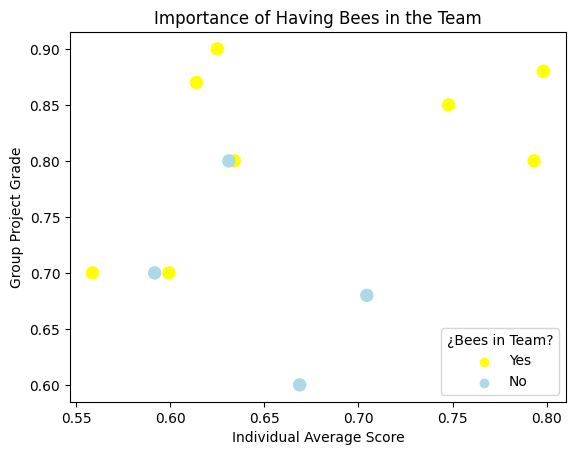

In [40]:
# Create a scatter plot with larger dots
plt.scatter(dfg['indiv_mean_perf'], dfg['final_project'], s=75, c=dfg['has_bee'].map({True: 'yellow', False: 'lightblue'}))

# Set labels and title
plt.xlabel('Individual Average Score')
plt.ylabel('Group Project Grade')
plt.title('Importance of Having Bees in the Team')

# Create a legend with explanations
legend_elements = [
    plt.scatter([], [], color='yellow', label='Yes'),
    plt.scatter([], [], color='lightblue', label='No')
]
plt.legend(handles=legend_elements, loc='lower right', title='¿Bees in Team?')

# Display the plot
plt.show()
